In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
%matplotlib inline

C:\anaconda\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

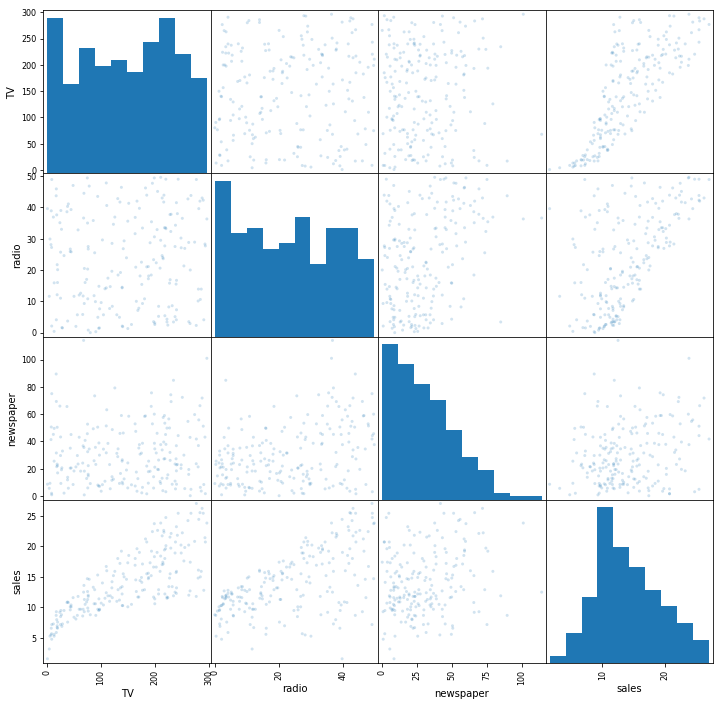

In [4]:
scatter_matrix(df, alpha=0.2, figsize=(12,12))
None 

In [5]:
from itertools import combinations
rows = []
for i in range(1,11):
    combos = list(combinations(['TV', 'radio', 'newspaper'],i))
    for j,com in enumerate(combos):
        y = df.sales
        X = pd.DataFrame(df, columns=com)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        model = linear_model.LinearRegression(fit_intercept=True).fit(X_train, y_train)
        score = model.score(X_test, y_test)
        s = ', '.join(com)
        rows.append({'Score':score, 'Columns':s, 'Coef':model.coef_,'Int':model.intercept_})
        # print('score:', score, 'columns:', s)
df1 = pd.DataFrame(rows)
df1

Coef               Columns  \
0                                  [0.0482245128152]                    TV   
1                                   [0.223774515044]                 radio   
2                                  [0.0658344742479]             newspaper   
3                  [0.0447396196487, 0.199355464099]             TV, radio   
4                 [0.0472036046549, 0.0507723040181]         TV, newspaper   
5                  [0.216625857637, 0.0156987409941]      radio, newspaper   
6  [0.0446651206327, 0.196630062826, 0.0060743865...  TV, radio, newspaper   

         Int     Score  
0   7.066583  0.623689  
1   9.290417  0.081757  
2  12.602571 -0.111407  
3   2.867355  0.859348  
4   5.673310  0.643582  
5   8.980343  0.071047  
6   2.758072  0.855557

In [6]:
df1.iloc[df1.Score.idxmax()]

Coef       [0.0447396196487, 0.199355464099]
Columns                            TV, radio
Int                                  2.86735
Score                               0.859348
Name: 3, dtype: object

# Final Answer

The best R-squared is 0.859348.

The equation is y-hat=0.048tv+0.199radio

In [8]:
y_hat=(0.048*199 + 0.199*32)
y_hat

15.92

The predicted sales for  TV=199, Radio=32, Newspaper=88 is 15.92

In [22]:
rows = []
for i in range(1,11):
    combos = list(combinations(['TV', 'radio', 'newspaper'],i))
    for j,com in enumerate(combos):
        y = df.sales
        X = pd.DataFrame(df, columns=com)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        model = linear_model.LinearRegression(fit_intercept=False, normalize = True).fit(X_train, y_train)
        score = model.score(X_test, y_test)
        s = ', '.join(com)
        rows.append({'Score':score, 'Columns':s, 'Coef':model.coef_,'Int':model.intercept_})
        # print('score:', score, 'columns:', s)
df1 = pd.DataFrame(rows)
df1

Coef               Columns  \
0                                 [0.0836113918268]                    TV   
1                                  [0.506253594753]                 radio   
2                                  [0.349023408698]             newspaper   
3                 [0.0539244890605, 0.241431961061]             TV, radio   
4                 [0.0665655550235, 0.108210290382]         TV, newspaper   
5                  [0.383738723667, 0.116026824632]      radio, newspaper   
6  [0.052290638823, 0.22477230256, 0.0233762837797]  TV, radio, newspaper   

   Int     Score  
0  0.0  0.003590  
1  0.0 -0.971840  
2  0.0 -2.281992  
3  0.0  0.795534  
4  0.0  0.351303  
5  0.0 -0.883228  
6  0.0  0.789118

In [23]:
df1.iloc[df1.Score.idxmax()]

Coef       [0.0539244890605, 0.241431961061]
Columns                            TV, radio
Int                                        0
Score                               0.795534
Name: 3, dtype: object

In [26]:
#Checking using OLS
y = df ['sales']
X = df[['TV','radio', 'newspaper']].astype(float) 
X['const'] = 1
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           1.58e-96
Time:                        08:52:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
const          2.9389      0.312      9.422      0.000       2.324       3.554
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
y = df ['sales']
X = df[['TV', 'radio','newspaper']].astype(float) 
#X['const'] = 1
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Thu, 11 Jan 2018   Prob (F-statistic):          2.43e-171
Time:                        08:54:31   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
y_hat=0.0538*199 + 0.2222*32 + 0.0168*88
y_hat

19.295

In [36]:
y = df ['sales']
X = df[['TV', 'radio']].astype(float) 
#X['const'] = 1
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5206.
Date:                Thu, 11 Jan 2018   Prob (F-statistic):          6.73e-172
Time:                        08:57:34   Log-Likelihood:                -426.71
No. Observations:                 200   AIC:                             857.4
Df Residuals:                     198   BIC:                             864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0548      0.001     42.962      0.000       0.052       0.057
radio          0.2356      0.008     29.909      0.000       0.220       0.251
==============================================================================
Omnibus:                        6.047   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                8.829
Skew:                          -0.112   Prob(JB):                       0.0121
Kurtosis:                       4.005   Cond. No.                         9.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""